# HW_3
## Furkan Kılınç

### Soru - 1 One hot encoding modelin görmediği veriye nasıl uygulanır?

Makine öğrenmesi algoritmaları doğrudan kategorik veriler üzerinde çalışmamaktadır bu yüzden verilerimizin sayısal verilere dönüştürülmesi gerekmektedir.
One Hot Encoding de kategorik verilerin binary olarak temsil edildiği bir yöntemidir. Bu işlem için öncelikle kategorik değerlerin tamsayı değerlerine dönüştürülmesi gerekmektedir.
Pandas.get_dummies bunu yapmamıza olanak sağlar.

Makine öğrenmesi modellerini verimizin bir kısmıyla eğitiriz ve eğitmediğimiz hiç görmediği test verisi üzerinde isabetli tahminler yapmasını bekleriz. Diğer bir deyişle, modelimizin genelleme yeteneğinin yüksek olmasını sadece o veri seti üzerinde iyi çalışmasını değil hiç görmediği başka veri setleri üzerinde de iyi sonuçlar vermesini bekleriz.

Modelin görmediği test verisi için de aşağıdaki gibi encoder.fit_transform(test_data) olarak uygulanabilir. Encoderın handle_unknown parametresi ignore verilerek test datasında olup, train datasında olmayan kategoriler yoksayılabilir.

```
enc = OneHotEncoder(handle_unknown='ignore')

```


In [145]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
df = pd.read_csv("veriler.csv")
ulke = df.iloc[:,0:1].values
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
# transform data
onehot = encoder.fit_transform(ulke)
print(onehot)


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### Soru - 2 Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)

One Hot Encoding'de olduğu gibi Label Encoding kategorik verilerin sayısal verilere dönüştürülmesini sağlar. Veriyi birebir sayısallaştırmaya yarar. Yani kategorik her veriye sayısal bir değer atar. 

In [146]:
# Label Encoding örneği
from numpy import asarray
from sklearn import preprocessing

#daha önce yaptığımız kategorik ülke datası için label encoder kullanılması
#encoder tanımlama
le = preprocessing.LabelEncoder()
# transform data
label = le.fit_transform(ulke)
print("'fr'= 0,'tr'= 1,'us'= 2 olmak üzere label encoding sonuçları")
print(label)
print("\n")

#ordinal data için encoding uygulanması
data=pd.DataFrame({'Temp':['very low','low','medium','high','very high','low','very low','high']})
Temp_dict = {"very low" : 1,
            "low" : 2,
            "medium" : 3,
            "high" : 4,
            "very high" : 5}
data["Temp_Ordinal"] = data.Temp.map(Temp_dict)
print(data)


'fr'= 0,'tr'= 1,'us'= 2 olmak üzere label encoding sonuçları
[1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 0 0 0 0 0]


        Temp  Temp_Ordinal
0   very low             1
1        low             2
2     medium             3
3       high             4
4  very high             5
5        low             2
6   very low             1
7       high             4


C:\Users\Furkan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Soru - 3 Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?

Imbalance dataset sınıflandırma yaparken, sınıfların eşit dağılmadığı veri kümesidir. Mesela, ikili sınıflandırma (binary classification) durumunda, 1000 verinin olduğu bir veri kümesindeki 50 verinin azınlık kümede (Küme-1), 950 verinin ise diğer kümeye (Küme-0) ait olması durumudur. Buna bağlı olarak uygulanabilecek çeşitli yöntemler bulunmaktadır.

**1 - STRATIFICATION**

Dengesiz veri kümelerini, eğitim veri kümesi (training dataset) ve test veri kümesi (test dataset) olarak ikiye ayırırken, verilerin dengesizlik oranında, eğitim ve test kümelerine eşit dağılması gerekir. Yani her iki kümede sınıfların oranının aynı olması, modelin performansının istikrarlı (consistency) olması açısından önemli.

Dolayısıyla, veri kümesini eğitim ve test veri kümelerine ayırırken, train_test_split() fonksiyonundaki “stratify” parametresiyle, çapraz doğrulama skorunu (cross-validation score) hesaplarken ve hiper parametreleri (hyper-parameters) GridSearchCV veya RandomizedSearchCV ile belirlerken katmanlama durumu dikkate almamız gerekir.

**2 - RESAMPLING**

Yeniden örnekleme yaparak, dengesiz veri kümelerini daha dengeli hale getirebiliriz. Bunu yapmak için ilk yöntem azınlık sınıfına (Küme-1) ait verileri çeşitli yöntemlerle arttırarak eşit sayıda veriye sahip sınıflar elde etmek (oversampling). 

Naive Random Over-Sampling , SMOTE, ADASYN gibi yöntemlerle sentetik veriler üreterek oversampling yapabiliriz.

Diğer yöntem ise ağırlıklı sınıfa (Küme-0) ait verileri veri kümesinden çıkararak dengeli bir veri kümesi elde etmektir. (undersampling). 

Random undersampling, ClusterCentroids ve NearMiss teknikleri veri kümesini dengeye getirmek için kullanılabilir. 

Eğer çalıştığınız veri kümesi yeterince büyük değilse bu yöntem, bilgi kaybına sebep olacağından diğer yöntemler tercih edilmelidir.

 ### Soru - 4 Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?

Validation dataset'in verimli çalışabilmesi için train ve test için model eğitilene kadar yaptğımız tüm işlemlerin validation dataseti üzerinde de yapılması gerekir. Validation dataseti asıl datasetin en son oluşturulmuş verileri kullanılarak ayrılabilir.

In [212]:
# kütüphanelerin yüklemesi
import pandas as pd
import numpy as np
from sklearn import preprocessing

veriler = pd.read_csv("veriler.csv")
ulke = veriler.iloc[:,0:1].values

ohe = preprocessing.OneHotEncoder() # kolon başlıklarına etiketleri taşır ve her etiketin altına 1 veya 0 diyerek oraya ait olup olmadığını belirtir
ulke = ohe.fit_transform(ulke).toarray()

#numpy dizileri dataframe dönüşümleri

sonuc = pd.DataFrame(data=ulke, index = range(22), columns = ["fr","tr","us"])
#print(sonuc)

#verilerin eğitim ve test için bölünmesi
from sklearn.model_selection import train_test_split
x_train, x_val = train_test_split(sonuc, test_size=0.33, random_state=0)


from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

X_train = sc.fit_transform(x_train)
X_val = sc.fit_transform(x_val)


print(X_train)
print(X_val)

[[-0.63245553  0.8660254  -0.40824829]
 [-0.63245553  0.8660254  -0.40824829]
 [ 1.58113883 -1.15470054 -0.40824829]
 [-0.63245553  0.8660254  -0.40824829]
 [-0.63245553  0.8660254  -0.40824829]
 [-0.63245553  0.8660254  -0.40824829]
 [ 1.58113883 -1.15470054 -0.40824829]
 [-0.63245553 -1.15470054  2.44948974]
 [-0.63245553  0.8660254  -0.40824829]
 [ 1.58113883 -1.15470054 -0.40824829]
 [-0.63245553  0.8660254  -0.40824829]
 [-0.63245553  0.8660254  -0.40824829]
 [ 1.58113883 -1.15470054 -0.40824829]
 [-0.63245553 -1.15470054  2.44948974]]
[[ 1.29099445 -0.37796447 -1.        ]
 [-0.77459667 -0.37796447  1.        ]
 [-0.77459667 -0.37796447  1.        ]
 [-0.77459667 -0.37796447  1.        ]
 [-0.77459667  2.64575131 -1.        ]
 [ 1.29099445 -0.37796447 -1.        ]
 [-0.77459667 -0.37796447  1.        ]
 [ 1.29099445 -0.37796447 -1.        ]]


### Soru - 5 predict_proba metoduyla oran nasıl hesaplanır ve threshold nasıl değiştirilir?


Direkt sınıfı tahmin etmek yerine o sınıfın olma olasılığını hesaplamak için predict_proba kullanılır. Bu olasılık üzerinden belirli bir threshold üzerinde olasılık hesaplanırsa değer 1 olarak, altında hesaplanır ise değer 0 olarak atanır. Aşağıdaki örnekte threshold değeri 0.5 olarak belirlenmiştir.

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# make_blobs data seti kullanıldı
X, y = make_blobs(n_samples=6)
# LogisticRegression model tanımı
model = LogisticRegression()
model.fit(X, y)
# make a prediction
predictions = model.predict_proba(X)[:,1]
print(predictions)
# 0.5 threshold tanımlandı. eğer 0.5'den büyükse 1 olarak al.
thres_pred = [1 if i > 0.5 else 0 for i in predictions]
print(thres_pred)


[0.97099487 0.00566355 0.95907733 0.02642489 0.0236068  0.01423239]
[1, 0, 1, 0, 0, 0]


### Soru - 6 Fraud case'i üzerinde train&test&validation split, encoding, scaling,modelleme çalışmaları Python'da yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği yapılmalı.

In [150]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

#ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import random

In [151]:
df = pd.read_csv(r'auto_insurance_csv.csv')
df = df.drop(['_c39','Unnamed: 0'], axis = 1)
df['umbrella_limit'] = df.umbrella_limit.fillna("9999")
df['police_report_available'] = df.police_report_available.fillna("MISSING")
df['policy_csl'] = df.policy_csl.fillna("MISSING")
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days
df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)
df['umbrella_limit'] = df.umbrella_limit.astype(str)
umbrealla = df['umbrella_limit'].unique()
for umb in umbrealla:
  if (umb != '0.0') & (umb != '9999'):
    df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')
    
hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')

df['age'] = df.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]

df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels, include_lowest = True)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins, labels=bin_labels)
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins, labels = bin_labels)

df = df.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)
required_columns = ['incident_date','policy_state', 'policy_csl', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'location_check', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups', 'policy_deductable_group']
df1 = df[required_columns]

<ipython-input-151-fc21bf130c12>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')


In [152]:
df1

,incident_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,2015-01-25,OH,250/500,0.0,466132,MALE,MD,craft-repair,other,husband,...,Saab,92x,2004,1,100,False,46-50,301-350,medium,501-1000
1,2015-01-21,IN,250/500,other,468176,MALE,MD,machine-op-inspct,other,other-relative,...,Mercedes,E400,2007,1,3130,False,41-45,201-250,medium,1501-2000
2,2015-02-22,OH,MISSING,other,430632,FEMALE,PhD,sales,other,own-child,...,Dodge,RAM,2007,0,5282,False,26-30,101-150,medium,1501-2000
3,2015-01-10,IL,MISSING,other,608117,FEMALE,PhD,armed-forces,other,unmarried,...,Chevrolet,Tahoe,2014,1,8996,False,41-45,251-300,medium,1501-2000
4,2015-02-17,IL,MISSING,other,610706,MALE,Associate,sales,other,unmarried,...,Accura,RSX,2009,0,256,False,41-45,201-250,high,501-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2015-02-22,OH,MISSING,0.0,431289,FEMALE,Masters,craft-repair,other,unmarried,...,Honda,Accord,2006,0,8622,False,36-40,0-50,medium,501-1000
996,2015-01-24,IL,MISSING,9999,608177,FEMALE,PhD,prof-specialty,other,wife,...,Volkswagen,Passat,2015,0,384,False,41-45,251-300,medium,501-1000
997,2015-01-23,OH,250/500,other,442797,FEMALE,Masters,armed-forces,other,other-relative,...,Suburu,Impreza,1996,0,4358,False,9999,101-150,medium,0-500
998,2015-02-26,IL,500/1000,9999,441714,MALE,Associate,handlers-cleaners,other,wife,...,Audi,A5,1998,0,1196,False,61-65,451-500,medium,1501-2000


In [153]:
df1.incident_date.count() #incident_date sayısı

1000

In [154]:
# verilerin 200'e 800 olarak validation ve train dataseti olarak ayrılması
df1_val = df1.sort_values(by='incident_date',ascending=False).head(200) 
df2 = df1.sort_values(by='incident_date',ascending=False).tail(800)

In [155]:
df1.sort_values(by='incident_date',ascending=False) #incident_date'e göre sıralanması

,incident_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
752,2015-03-01,IL,MISSING,0.0,441533,MALE,PhD,machine-op-inspct,other,unmarried,...,Chevrolet,Tahoe,1997,0,5718,False,9999,401-450,low,0-500
74,2015-03-01,IL,MISSING,0.0,472895,FEMALE,Associate,sales,other,wife,...,BMW,X6,2005,0,3972,False,36-40,201-250,medium,501-1000
914,2015-03-01,OH,MISSING,0.0,436364,FEMALE,JD,transport-moving,cross-fit,own-child,...,Honda,Accord,1998,0,5343,False,36-40,101-150,low,1501-2000
883,2015-03-01,OH,MISSING,0.0,479824,FEMALE,Associate,exec-managerial,other,not-in-family,...,Audi,A5,2005,1,3374,False,31-35,101-150,medium,501-1000
839,2015-03-01,OH,MISSING,0.0,448294,MALE,Associate,protective-serv,other,own-child,...,Dodge,Neon,2011,0,9106,False,41-45,201-250,medium,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,2015-01-01,IN,MISSING,0.0,472814,FEMALE,JD,machine-op-inspct,other,other-relative,...,Ford,F150,2011,0,8397,False,26-30,101-150,high,0-500
457,2015-01-01,IL,100/300,0.0,470559,MALE,Masters,transport-moving,other,own-child,...,Volkswagen,Passat,2011,1,759,False,26-30,101-150,high,1501-2000
478,2015-01-01,IL,500/1000,9999,477260,MALE,Masters,armed-forces,chess,unmarried,...,Mercedes,C300,2001,1,6130,False,51-55,401-450,low,1501-2000
41,2015-01-01,IN,250/500,0.0,470577,MALE,Associate,transport-moving,chess,unmarried,...,BMW,X5,2001,1,854,False,9999,101-150,high,0-500


In [156]:
#incident_date kolonunun kaldırılması
df1_val = df1_val.drop(["incident_date"],axis=1)
df2 = df2.drop(["incident_date"],axis=1)

In [157]:
#incident_location kolonunun kaldırılması
df1_val = df1_val.drop(["incident_location"],axis=1)
df2 = df2.drop(["incident_location"],axis=1)

In [158]:
df2

,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
511,OH,MISSING,0.0,446755,FEMALE,JD,sales,other,husband,0,...,Volkswagen,Jetta,2003,0,4427,False,46-50,251-300,medium,501-1000
894,IN,MISSING,0.0,475891,MALE,MD,priv-house-serv,other,not-in-family,0,...,Suburu,Impreza,2000,0,8921,False,31-35,0-50,medium,0-500
125,IN,MISSING,other,603948,MALE,JD,craft-repair,other,unmarried,47200,...,Ford,Escape,2013,0,205,False,36-40,201-250,medium,501-1000
895,IL,MISSING,0.0,462525,MALE,High School,armed-forces,other,own-child,26500,...,Saab,92x,1998,1,1980,False,36-40,151-200,medium,0-500
485,IN,MISSING,0.0,471366,MALE,Associate,adm-clerical,other,husband,0,...,Nissan,Maxima,1995,0,7692,False,26-30,51-100,medium,1501-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,IN,MISSING,0.0,472814,FEMALE,JD,machine-op-inspct,other,other-relative,0,...,Ford,F150,2011,0,8397,False,26-30,101-150,high,0-500
457,IL,100/300,0.0,470559,MALE,Masters,transport-moving,other,own-child,38000,...,Volkswagen,Passat,2011,1,759,False,26-30,101-150,high,1501-2000
478,IL,500/1000,9999,477260,MALE,Masters,armed-forces,chess,unmarried,0,...,Mercedes,C300,2001,1,6130,False,51-55,401-450,low,1501-2000
41,IN,250/500,0.0,470577,MALE,Associate,transport-moving,chess,unmarried,0,...,BMW,X5,2001,1,854,False,9999,101-150,high,0-500


In [159]:
#kullanacağımız column listesinin oluşturulması
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  df2[col] = df2[col].astype('object')

columns_to_encode = []
for col in df2.columns:
  if df2[col].dtype == 'object':
    columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'policy_csl',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'location_check',
 'age_group',
 'months_as_customer_groups',
 'policy_annual_premium_groups',
 'policy_deductable_group']

In [160]:
#Ordinal Encoding yapılacak columnların columns_to_encode listesinden silinmesi
columns_to_encode.remove('insured_education_level')
columns_to_encode.remove('age_group')
columns_to_encode.remove('months_as_customer_groups')
columns_to_encode.remove('policy_annual_premium_groups')
columns_to_encode.remove('incident_severity')

### Ordinal Encoding İşlemleri

In [161]:
edu_dict = {
    'JD' : 5,
    'High School' : 0,
    'MD' : 6,
    'Associate' : 1,
    'College' : 2,
    'Masters' : 3,
    'PhD' : 4
}
df2["insured_education_level"] = df2.insured_education_level.map(edu_dict)

In [162]:
severity_dict = {
    'Trivial Damage' : 0,
    'Minor Damage' : 1,
    'Major Damage' : 2,
    'Total Loss' : 3
}
df2["incident_severity"] = df2.incident_severity.map(severity_dict)

In [163]:
macg_dict = {
    '0-50' : 1,
    '51-100' : 2,
    '101-150' : 3,
    '151-200' : 4,
    '201-250' : 5,
    '251-300' : 6,
    '301-350' : 7,
    '351-400' : 8,
    '401-450' : 9,
    '451-500' : 10
}
df2["months_as_customer_groups"] = df2.months_as_customer_groups.map(macg_dict)

In [164]:
age_dict = {
    '15-20' : 1,
    '21-25' : 2,
    '26-30' : 3,
    '31-35' : 4,
    '36-40' : 5,
    '41-45' : 6,
    '46-50' : 7,
    '51-55' : 8,
    '56-60' : 9,
    '61-65' : 10,
    '9999':11
}
df2["age_group"] = df2.age_group.map(age_dict)

In [165]:
papg_dict = {
    'very low' : 0,
    'low' : 1,
    'medium' : 2,
    'high' : 3,
    'very high' : 4
}
df2['policy_annual_premium_groups'] = df2.policy_annual_premium_groups.map(papg_dict)


In [166]:
#get_dummies ile column isimlerinin alınması
columns_names = pd.get_dummies(df2, columns = columns_to_encode)
columns_names_list = columns_names.columns.values.tolist()
#columns_names_list = []
#for _ in columns_names.columns:
    #columns_names_list.append(_)
columns_names_list

['insured_zip',
 'insured_education_level',
 'capital-gains',
 'capital-loss',
 'incident_severity',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'auto_year',
 'fraud_reported',
 'claim_day_of_policy',
 'age_group',
 'months_as_customer_groups',
 'policy_annual_premium_groups',
 'policy_state_IL',
 'policy_state_IN',
 'policy_state_OH',
 'policy_csl_100/300',
 'policy_csl_250/500',
 'policy_csl_500/1000',
 'policy_csl_MISSING',
 'umbrella_limit_0.0',
 'umbrella_limit_9999',
 'umbrella_limit_other',
 'insured_sex_FEMALE',
 'insured_sex_MALE',
 'insured_occupation_adm-clerical',
 'insured_occupation_armed-forces',
 'insured_occupation_craft-repair',
 'insured_occupation_exec-managerial',
 'insured_occupation_farming-fishing',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_machine-op-inspct',
 'insured_occupation_other-service',
 'insured_occupation_priv-house-serv',
 'insured_occupation_prof-specialt

In [167]:
# df_sayisal, sayısal columnları ve ordinal encoding yapılmış columnları tanımlamakta
df_sayisal = columns_names.iloc[:,:16]
new_columns_names_list = columns_names_list[16:]
new_columns_names_list

['policy_state_IL',
 'policy_state_IN',
 'policy_state_OH',
 'policy_csl_100/300',
 'policy_csl_250/500',
 'policy_csl_500/1000',
 'policy_csl_MISSING',
 'umbrella_limit_0.0',
 'umbrella_limit_9999',
 'umbrella_limit_other',
 'insured_sex_FEMALE',
 'insured_sex_MALE',
 'insured_occupation_adm-clerical',
 'insured_occupation_armed-forces',
 'insured_occupation_craft-repair',
 'insured_occupation_exec-managerial',
 'insured_occupation_farming-fishing',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_machine-op-inspct',
 'insured_occupation_other-service',
 'insured_occupation_priv-house-serv',
 'insured_occupation_prof-specialty',
 'insured_occupation_protective-serv',
 'insured_occupation_sales',
 'insured_occupation_tech-support',
 'insured_occupation_transport-moving',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'insured_hobbies_other',
 'insured_relationship_husband',
 'insured_relationship_not-in-family',
 'insured_relationship_other-relative',
 'insured_r

In [168]:
df_sayisal.columns

Index(['insured_zip', 'insured_education_level', 'capital-gains',
       'capital-loss', 'incident_severity', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'auto_year', 'fraud_reported',
       'claim_day_of_policy', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups'],
      dtype='object')

In [169]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
df3=ohe.fit_transform(df2[columns_to_encode]).toarray()


In [170]:
#Sayısal columnlar ile encoding edilmiş kategorik columnları birleştirirken bazı satırlar NaN oluyordu. 
#reset_index ile NaN olan satırların düzeltilmesi
df_sayisal.reset_index(drop=True, inplace=True)

In [171]:
#Bütün DataFramelerin birleştirilmesi
df4 = pd.DataFrame(df3, columns = new_columns_names_list )
df5 = pd.concat([df_sayisal,df4], axis=1)

df5 #modele sokmaya hazır olan dataframe

,insured_zip,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,...,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,location_check_False,location_check_True,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,446755,5,0,-46200,0,9,1,2,3,6560,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,475891,6,0,0,1,6,1,1,3,6000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,603948,5,47200,-69700,3,12,3,2,3,36300,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,462525,0,26500,0,2,23,3,0,3,55200,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,471366,1,0,-31700,3,0,1,2,1,48290,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,472814,5,0,0,3,3,4,0,1,67800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
796,470559,3,38000,-41200,2,5,1,2,1,79800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
797,477260,3,0,0,1,6,1,1,2,6300,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
798,470577,1,0,-24100,2,1,1,1,1,97080,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [172]:
#fraud_reported columnunun target olarak belirlenmesi
features = []
for col in df5.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X = df5[features]
y = df5[target]

In [173]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [174]:
X

array([[-0.76745023,  0.95423509, -0.90867046, ..., -0.71374643,
        -0.67616189,  1.36652242],
       [-0.36042417,  1.43586795, -0.90867046, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.42851515,  0.95423509,  0.79450874, ..., -0.71374643,
        -0.67616189,  1.36652242],
       ...,
       [-0.34129942, -0.00903062, -0.90867046, ..., -0.71374643,
         1.47893576, -0.73178456],
       [-0.43466004, -0.97229632, -0.90867046, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.55253963,  0.95423509,  0.97493027, ...,  1.4010578 ,
        -0.67616189, -0.73178456]])

In [175]:
#oversampling
oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)

C:\Users\Furkan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

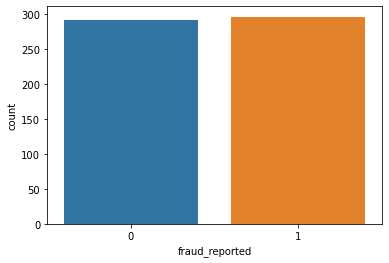

In [176]:
chck = pd.DataFrame()
chck['fraud_reported'] = y_train

sns.countplot(chck['fraud_reported'])

94.44444444444444

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       128
           1       0.97      0.91      0.94       124

    accuracy                           0.94       252
   macro avg       0.95      0.94      0.94       252
weighted avg       0.95      0.94      0.94       252



<AxesSubplot:>

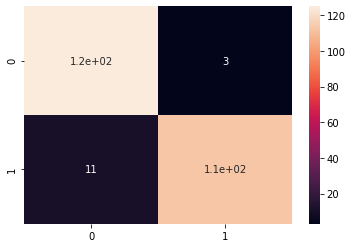

In [177]:
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [178]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [300, 650, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 17, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 17, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 650, 1000]},
                   random_state=42, verbose=2)

In [179]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 17,
 'bootstrap': False}

95.23809523809523

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       128
           1       0.92      0.98      0.95       124

    accuracy                           0.95       252
   macro avg       0.95      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252



<AxesSubplot:>

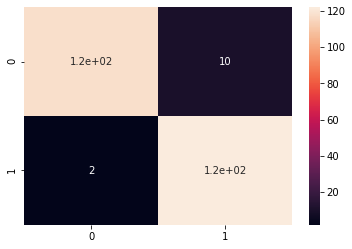

In [180]:
#rf2 = RandomForestClassifier(n_estimators=650,min_samples_split=5,min_samples_leaf=1,max_features='sqrt'
                            #,max_depth=30,bootstrap='False')
from sklearn.svm import SVC
#rf2 = SVC(kernel='rbf', gamma=0.01)
from catboost import CatBoostClassifier
rf2=CatBoostClassifier(verbose=0, n_estimators=2000)
rf2.fit(X_train, y_train)

preds = rf2.predict(X_test)

score = rf2.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

### Validation datasının hazırlanması

In [181]:
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  df1_val[col] = df1_val[col].astype('object')

columns_to_encode = []
for col in df1_val.columns:
  if df1_val[col].dtype == 'object':
    columns_to_encode.append(col)
    
columns_to_encode.remove('insured_education_level')
columns_to_encode.remove('age_group')
columns_to_encode.remove('months_as_customer_groups')
columns_to_encode.remove('policy_annual_premium_groups')
columns_to_encode.remove('incident_severity')


df2_val = pd.DataFrame(ohe.transform(df1_val[columns_to_encode]).toarray(), columns= new_columns_names_list)

In [182]:
edu_dict = {
    'JD' : 5,
    'High School' : 0,
    'MD' : 6,
    'Associate' : 1,
    'College' : 2,
    'Masters' : 3,
    'PhD' : 4
}
df1_val["insured_education_level"] = df1_val.insured_education_level.map(edu_dict)

In [183]:
severity_dict = {
    'Trivial Damage' : 0,
    'Minor Damage' : 1,
    'Major Damage' : 2,
    'Total Loss' : 3
}
df1_val["incident_severity"] = df1_val.incident_severity.map(severity_dict)

In [184]:
macg_dict = {
    '0-50' : 1,
    '51-100' : 2,
    '101-150' : 3,
    '151-200' : 4,
    '201-250' : 5,
    '251-300' : 6,
    '301-350' : 7,
    '351-400' : 8,
    '401-450' : 9,
    '451-500' : 10
}
df1_val["months_as_customer_groups"] = df1_val.months_as_customer_groups.map(macg_dict)

In [185]:
age_dict = {
    '15-20' : 1,
    '21-25' : 2,
    '26-30' : 3,
    '31-35' : 4,
    '36-40' : 5,
    '41-45' : 6,
    '46-50' : 7,
    '51-55' : 8,
    '56-60' : 9,
    '61-65' : 10,
    '9999':11
}
df1_val["age_group"] = df1_val.age_group.map(age_dict)

In [186]:
papg_dict = {
    'very low' : 0,
    'low' : 1,
    'medium' : 2,
    'high' : 3,
    'very high' : 4
}
df1_val['policy_annual_premium_groups'] = df1_val.policy_annual_premium_groups.map(papg_dict)

In [187]:
df2_val.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,policy_csl_MISSING,umbrella_limit_0.0,umbrella_limit_9999,umbrella_limit_other,...,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,location_check_False,location_check_True,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [188]:
df_sayisal_1 = columns_names_list[:16] # Sayısal kolonlar
df_val_num = pd.DataFrame(df1_val, columns = df_sayisal_1)

In [189]:
df_val_num.reset_index(drop=True, inplace=True)

In [190]:
df3_val = pd.concat([df_val_num,df2_val], axis=1)
df3_val.head()

,insured_zip,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,...,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,location_check_False,location_check_True,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,441533,4,57100,0,1,2,4,0,2,38640,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,472895,1,0,0,1,18,3,1,0,42930,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,436364,5,0,-67000,2,2,4,0,2,72800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,479824,1,0,0,2,18,3,0,3,34160,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,448294,1,0,-48800,2,4,1,2,2,51600,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [191]:
features = []
for col in df3_val.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X_val = df3_val[features]
y_val = df3_val[target]

In [192]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_val = sc.fit_transform(X_val)

### Validation Datasetinde RandomForestClassifier sonuçları

51.5

              precision    recall  f1-score   support

           0       0.90      0.68      0.77       163
           1       0.32      0.65      0.42        37

    accuracy                           0.68       200
   macro avg       0.61      0.66      0.60       200
weighted avg       0.79      0.68      0.71       200



<AxesSubplot:>

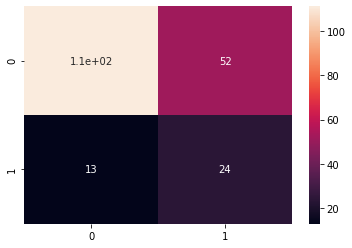

In [199]:
preds = rfc.predict_proba(X_val)[:,1]
y_pred = [1 if i > 0.55 else 0 for i in preds]
score = rfc.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
sns
sns.heatmap(cm, annot=True)

### Validation Datasetinde CatBoostClassifier sonuçları

CatBoostClassifier kullandığımızda modelin başarı oranı arttı.

72.5

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       163
           1       0.46      0.84      0.59        37

    accuracy                           0.79       200
   macro avg       0.71      0.81      0.72       200
weighted avg       0.86      0.79      0.81       200



<AxesSubplot:>

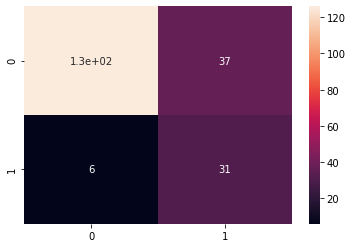

In [211]:
preds = rf2.predict_proba(X_val)[:,1]
y_pred = [1 if i > 0.62 else 0 for i in preds]
score = rf2.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
sns
sns.heatmap(cm, annot=True)